### Use power method to find the largest eigenvalue and the corresponding eigenvector of the matrices:
$$\begin{bmatrix} 0 & 2 \\ 2 & 3\end{bmatrix}$$

$$\begin{bmatrix} -4 & 14 & 0 \\ -5 & 13 & 0 \\ -1 & 0 & 2 \end{bmatrix}$$


In [2]:
import numpy as np

In [3]:
def normalize(vect):
    lmda=np.linalg.norm(vect,ord=np.inf)
    vect_norm=vect/lmda
    return vect_norm,lmda
    

In [4]:
x=[1,2,3,4,5]
normalize(x)

(array([0.2, 0.4, 0.6, 0.8, 1. ]), 5.0)

In [5]:
def power_method(A,iters,eps,X):
    X_list=[]
    for i in range(iters):
        X=np.dot(A,X)
        X_list.append(X)
        X,lmda=normalize(X)
        if abs(np.linalg.norm(X_list[i]-X_list[i-1]))<eps and i>0:
            print("break at {}".format(i))
            break 
            
    return X,lmda
        

In [6]:
A = np.array([[0, 2], 
              [2, 3]])
epsilon = 0.000001
X=np.ones((2,1))
vect,lmd=power_method(A,1000,epsilon,X)

break at 11


In [7]:
vect

array([[0.50000002],
       [1.        ]])

In [8]:
lmd

3.9999998013178586

In [9]:
A = np.array([[0, 2], 
              [2, 3]])
epsilon = 0.000001

In [10]:
A = np.array([[-4,14,0],
              [-5,13,0],
              [-1,0,2]])
epsilon = 0.00001
X=np.ones((3,1))
vect,lmd=power_method(A,1000,epsilon,X)

break at 18


In [11]:
vect

array([[ 1.        ],
       [ 0.71428595],
       [-0.24999918]])

In [12]:
lmd

6.0000065394952795

In [13]:
A = np.array([[-4,14,0],
              [-5,13,0],
              [-1,0,2]])
epsilon = 0.00001


## PageRank Algorithm
### Use the power method to find the rank of each node in the following graph:
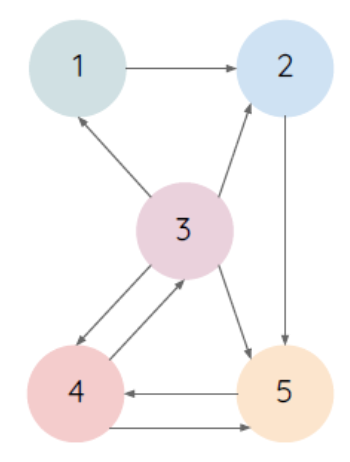

In [14]:
A=np.array([[0,0,0.25,0,0],[1,0,0.25,0,0],[0,0,0,0.5,0],[0,0,0.25,0,1],[0,1,0.25,0.5,0]])
A

array([[0.  , 0.  , 0.25, 0.  , 0.  ],
       [1.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 1.  ],
       [0.  , 1.  , 0.25, 0.5 , 0.  ]])

In [15]:
X,lmda=power_method(A,1000,0.00001,np.array([[1/5,1/5,1/5,1/5,1/5]]).T)

break at 26


In [16]:
lmda

1.0000033599733913

In [17]:
ranks=np.sort(X,axis=0)[: : -1]
ranks

array([[1.        ],
       [0.87499558],
       [0.49999832],
       [0.25000022],
       [0.12499941]])

In [18]:
epsilon = 0.00001

In [19]:
import pandas as pd

## Singular Value Decomposition SVD

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [22]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

Unit circle:


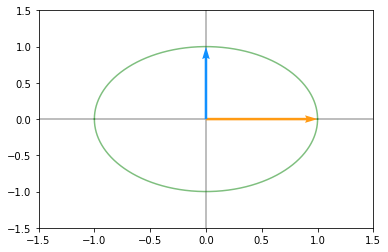

Unit circle transformed by A:


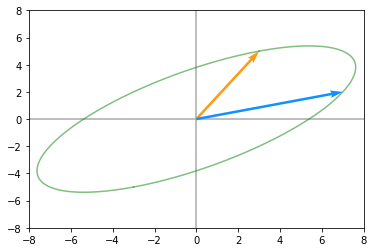

In [23]:
A = np.array([[3, 7], [5, 2]])

print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [24]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [25]:
D

array([8.71337969, 3.32821489])

In [26]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Unit circle:


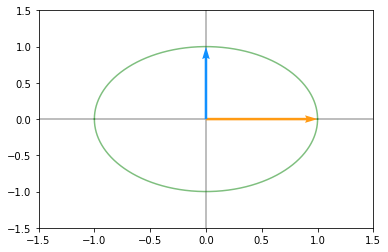

First rotation:


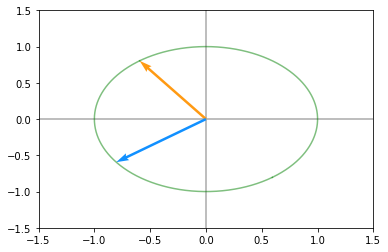

Scaling:


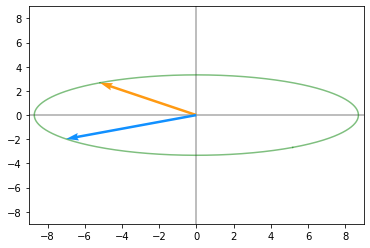

Second rotation:


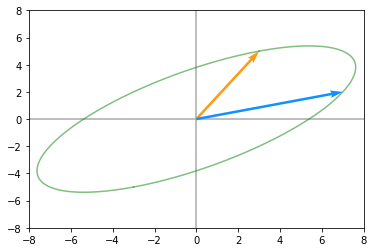

In [27]:
# Unit circle
print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print ('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

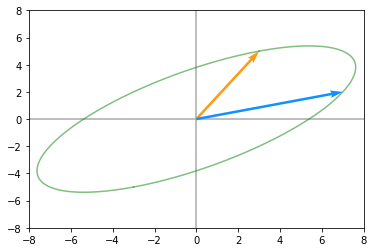

In [28]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## Singular values interpretation
- The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector (u1) and its norm will be the first singular value (σ1).
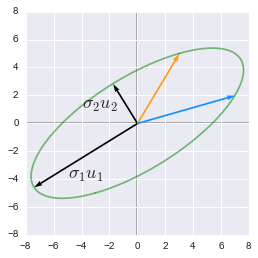

## SVD and eigendecomposition
- Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.
- The matrices U, D and V (V here is the right singular vectors i.e. V transpose from SVD point of view) can be found by transforming A in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix A by its transpose in one way or the other:
    - U  corresponds to the eigenvectors of A @ A.T
    - V  corresponds to the eigenvectors of A.T @ A
    - D  corresponds to the square root of eigenvalues A @ A.T or A.T @ A which are the same.

### Find SVD for the matrix A:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [29]:
A=np.array([[7,2],[3,4],[5,3]])
A

array([[7, 2],
       [3, 4],
       [5, 3]])

In [30]:
u, s, vh = np.linalg.svd(A)

In [31]:
u

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [32]:
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [33]:
s

array([10.25142677,  2.62835484])

In [34]:
D

array([8.71337969, 3.32821489])

In [35]:
vh

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

In [36]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

### Find the eigenvectors for A @ A.T and compare with the U obtained from SVD.

In [37]:
_,u=np.linalg.eig(A @A.T)
u

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

In [38]:
_

array([ 1.05091751e+02,  6.90824917e+00, -2.40082025e-15])

In [39]:
# The left-singular values


### Find the eigenvectors for  A.T @ A and compare with the V obtained from SVD.

In [40]:
_,v= np.linalg.eig(A.T @ A)
v

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

In [41]:
_

array([105.09175083,   6.90824917])

In [42]:
# The right-singular values


### Find the square root of the eigenvalues for A @ A.T or  A.T @ A and compare with D obtained from SVD

In [43]:
sing_values=np.sqrt(_)
sing_values

array([10.25142677,  2.62835484])

In [44]:
# The nonzero singular values


### Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

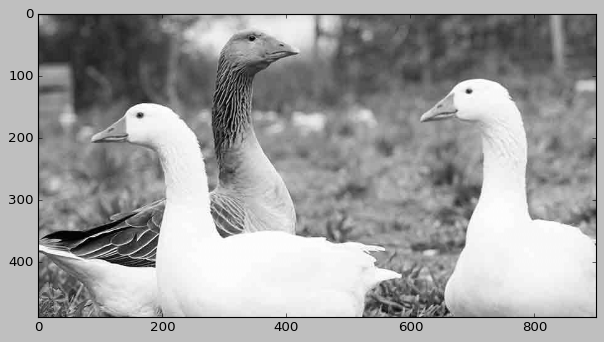

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the chape of the matrices (imgmat, U, D, and V)

In [20]:
u, s, vh = np.linalg.svd(imgmat, full_matrices=True)

In [21]:
imgmat.shape

(488, 900)

In [22]:
u.shape

(488, 488)

In [23]:
vh.shape

(900, 900)

In [24]:
s.shape


(488,)

### Remember that D are the singular values that need to be put into a diagonal matrix. Also, V doesn’t need to be transposed 

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components
### Try reconstruct the image from higher number of principal components and see the difference

In [31]:
Sigma = np.zeros((u.shape[0], vh.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:imgmat.shape[0], :imgmat.shape[0]] = np.diag(s)

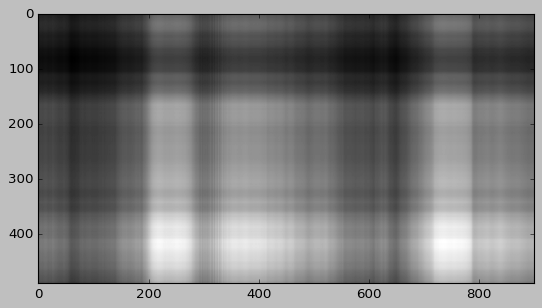

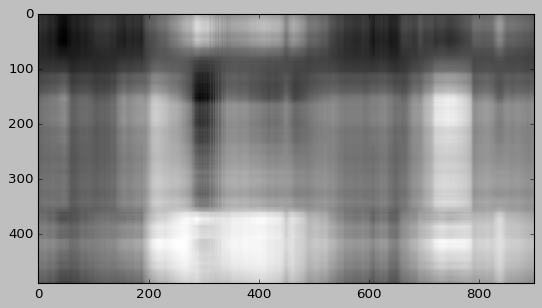

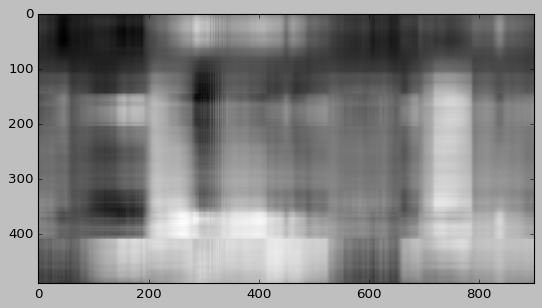

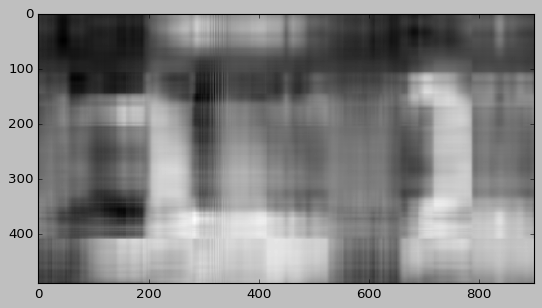

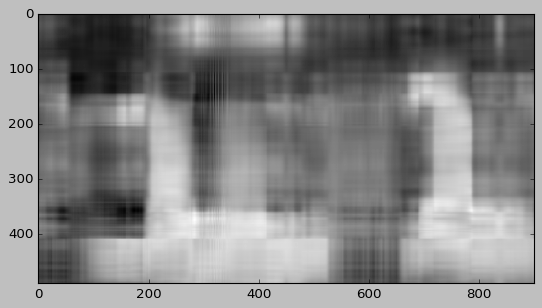

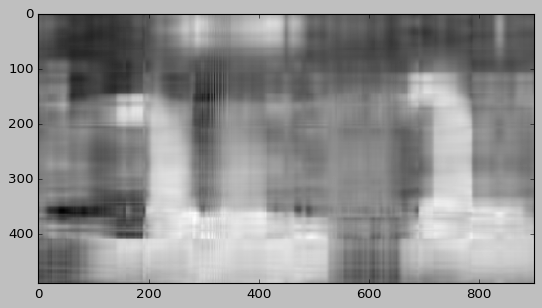

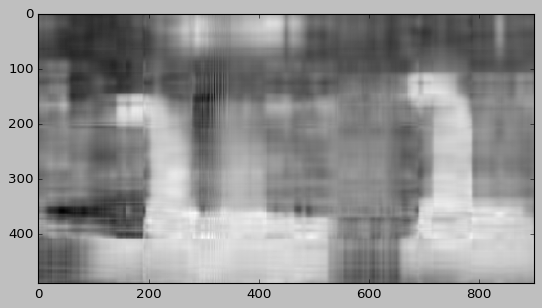

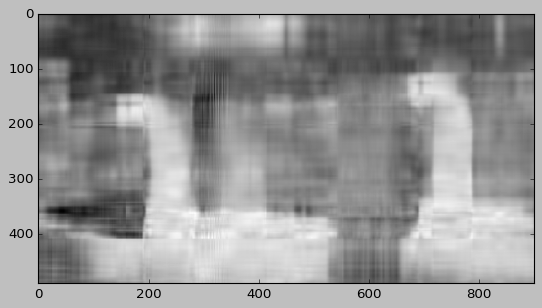

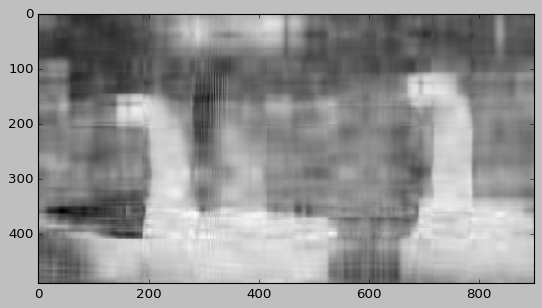

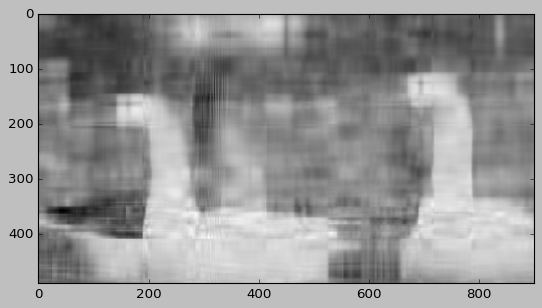

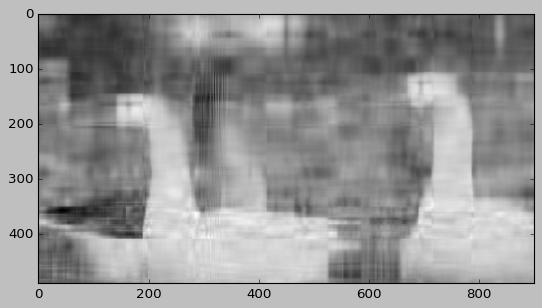

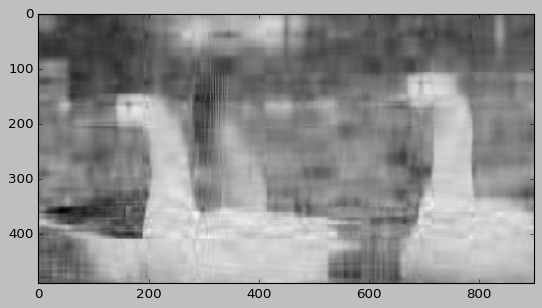

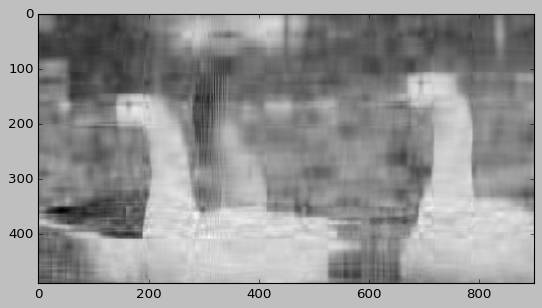

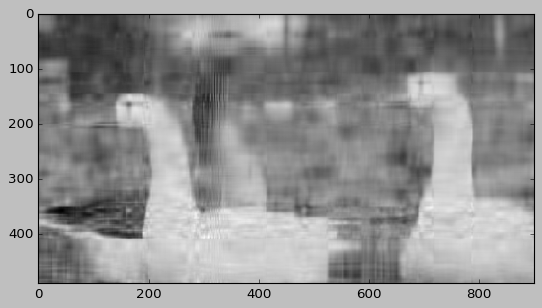

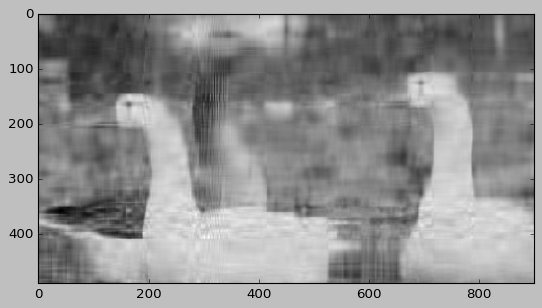

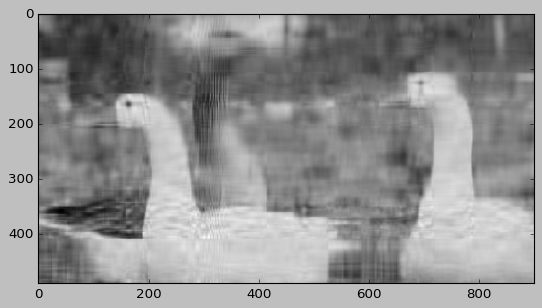

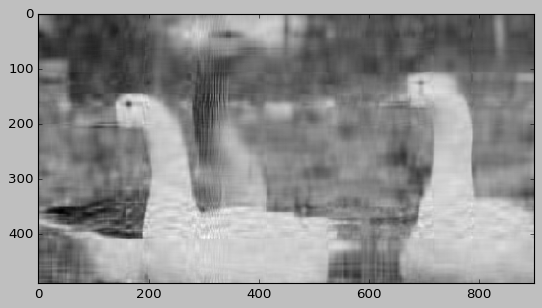

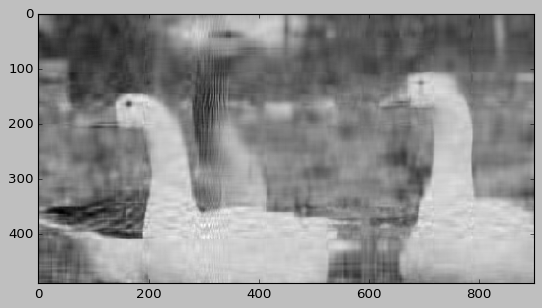

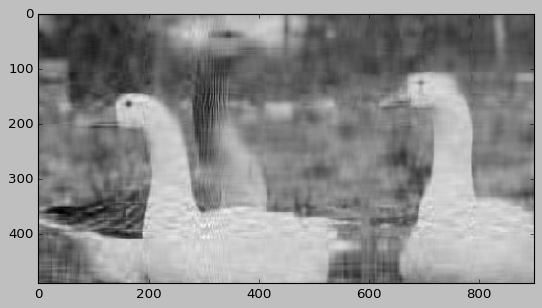

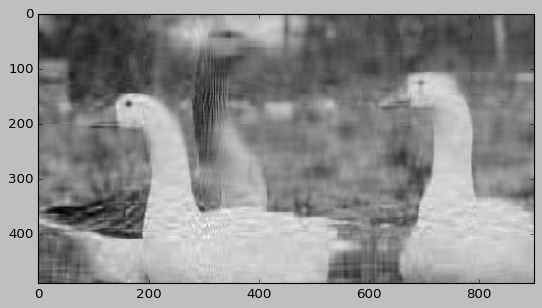

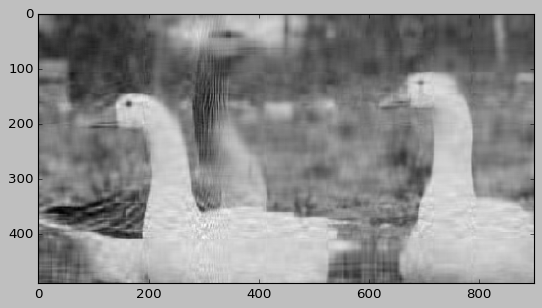

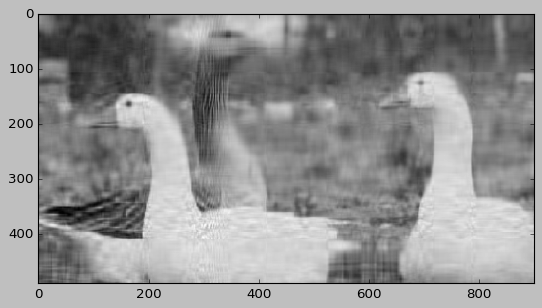

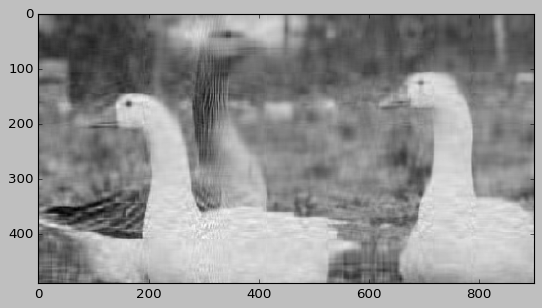

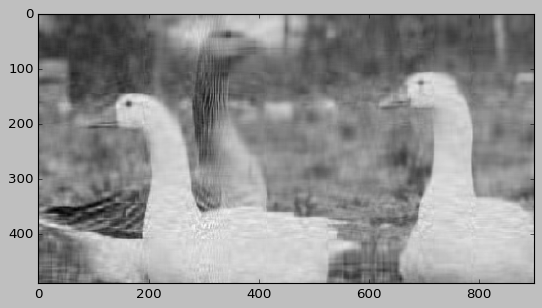

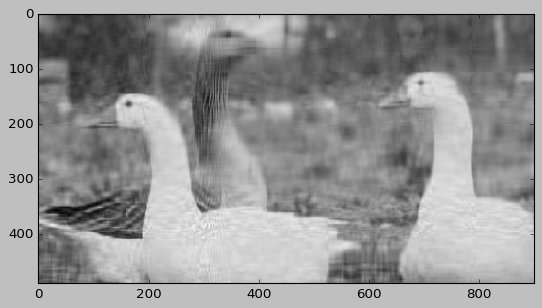

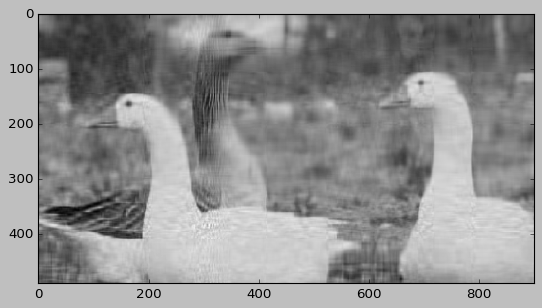

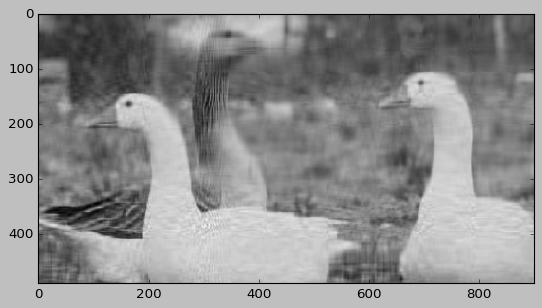

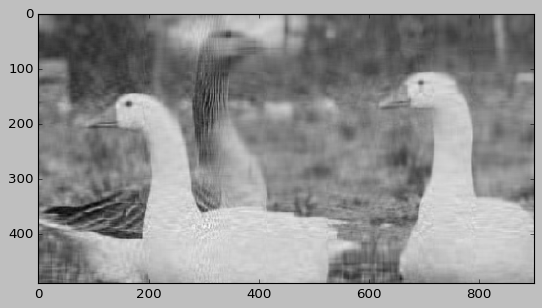

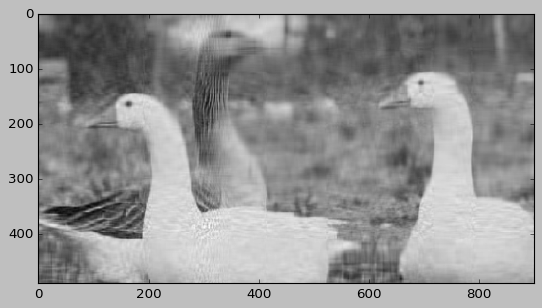

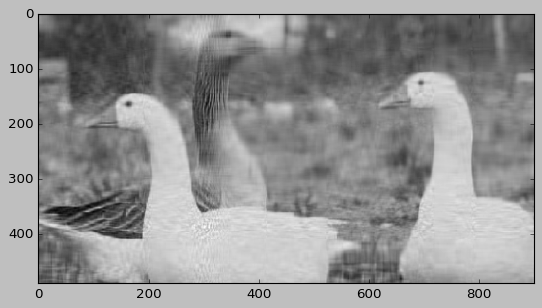

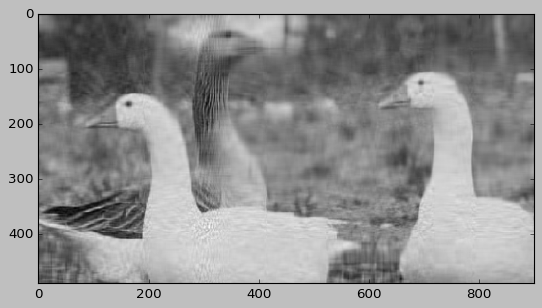

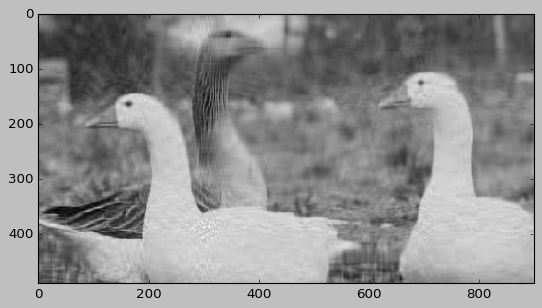

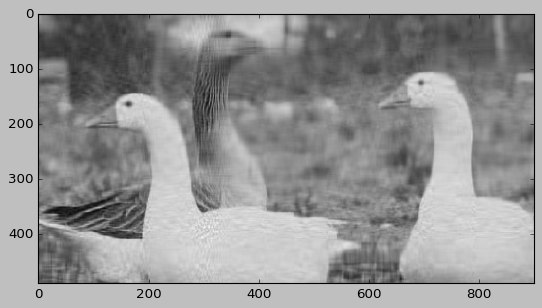

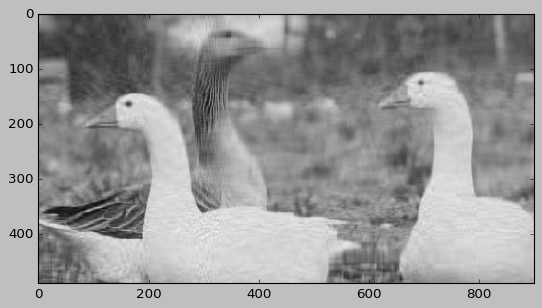

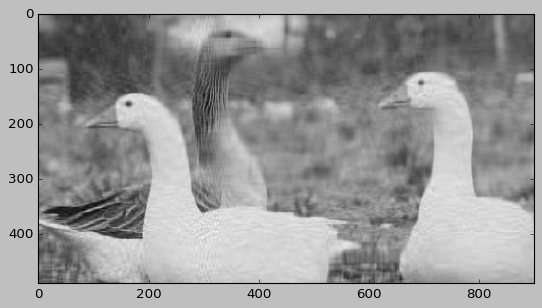

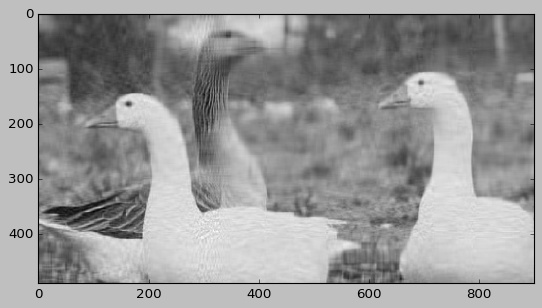

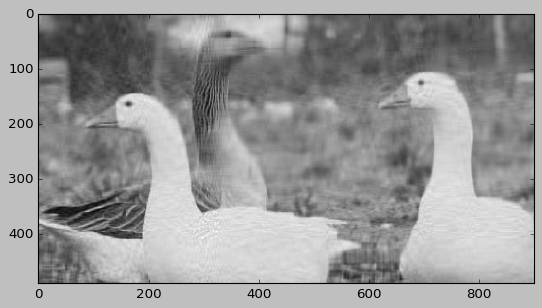

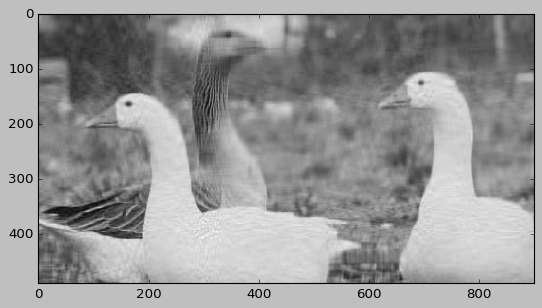

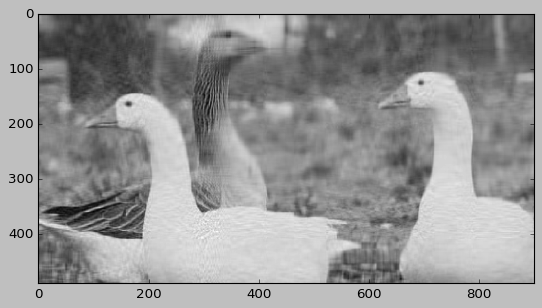

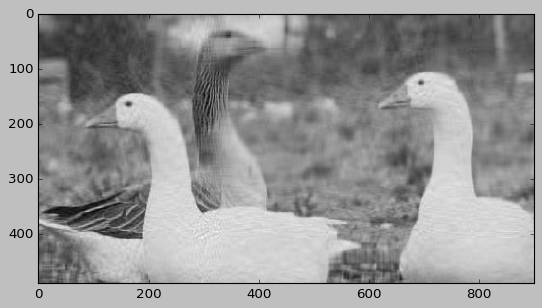

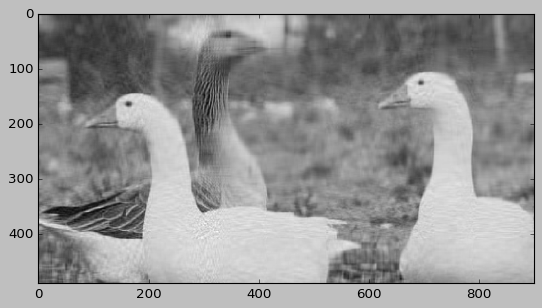

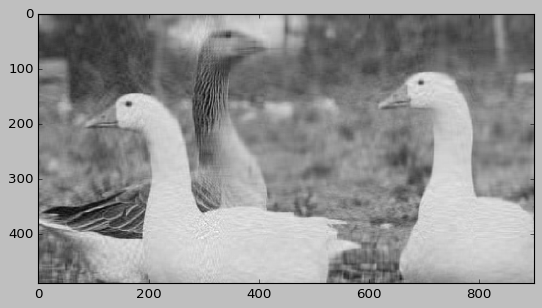

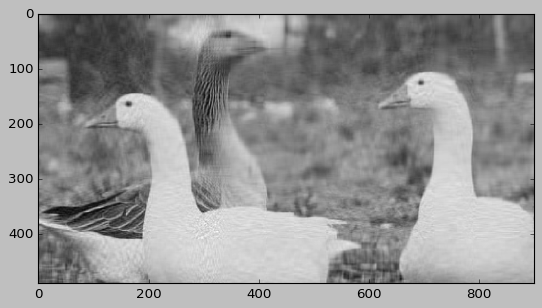

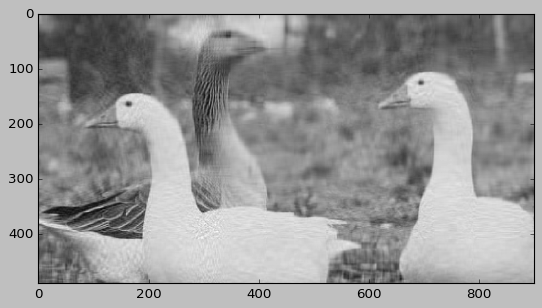

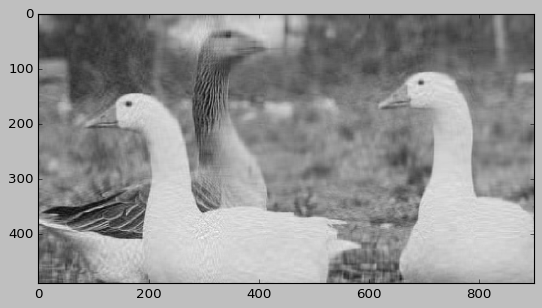

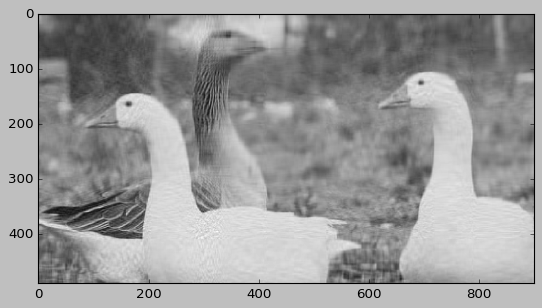

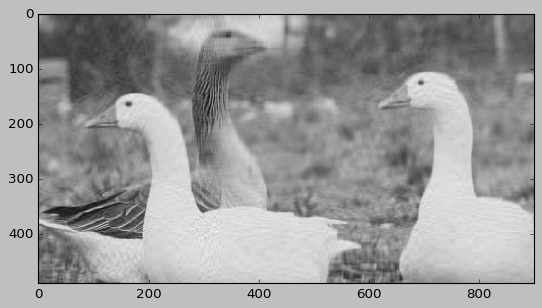

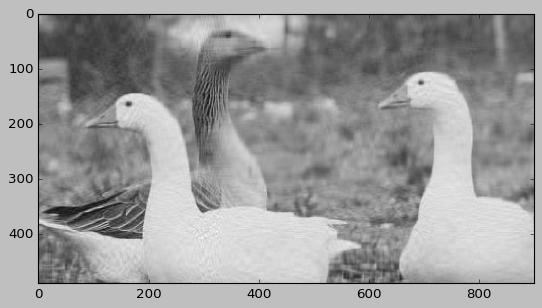

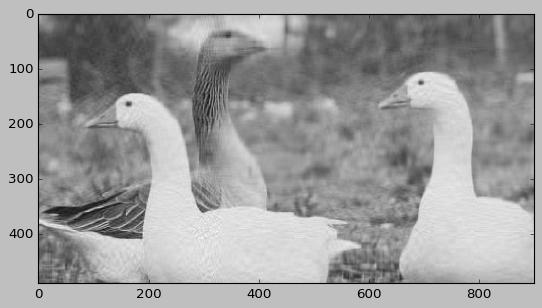

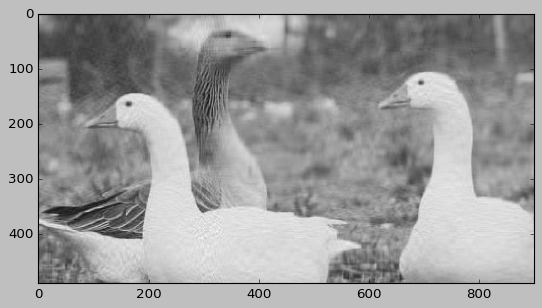

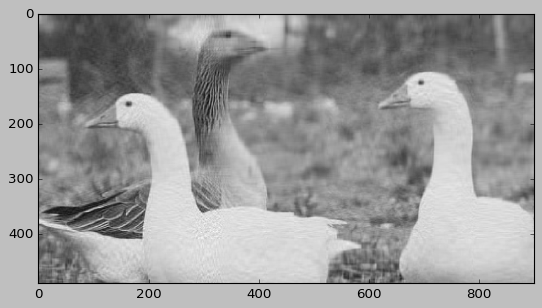

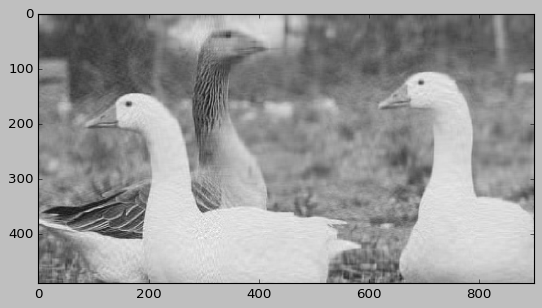

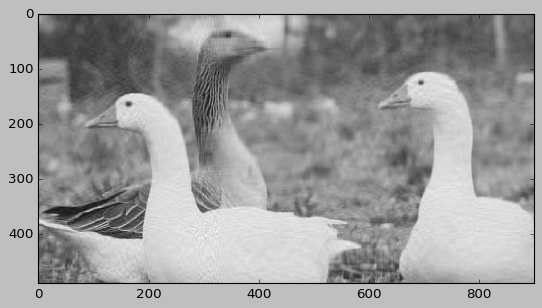

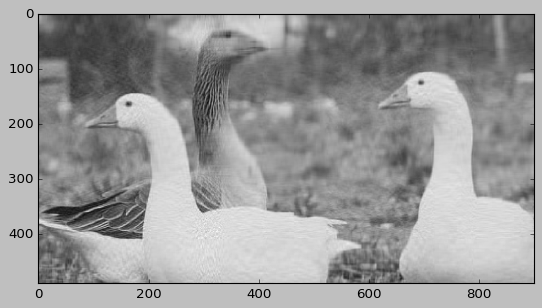

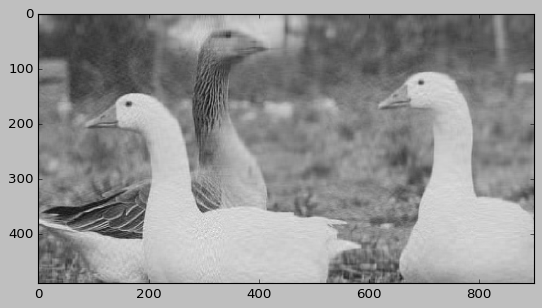

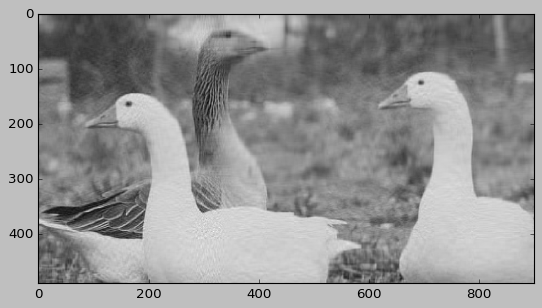

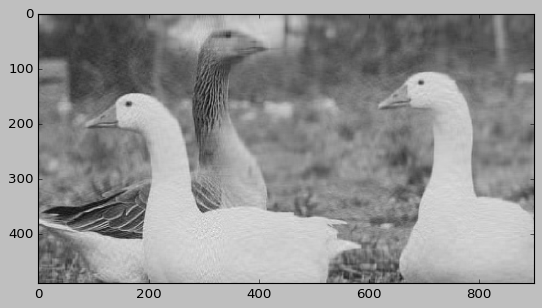

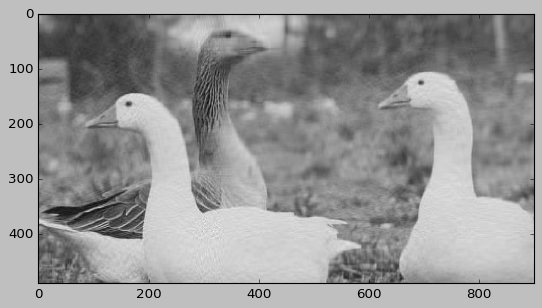

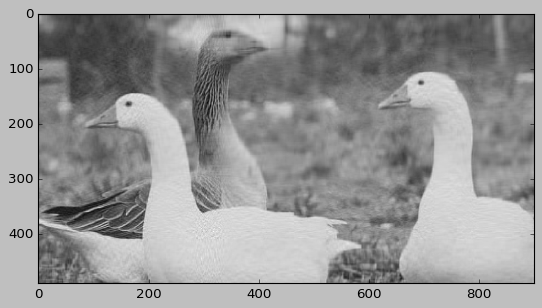

In [34]:
for i in range(1,60):
    imgg=u[:,:i]@Sigma[:i,:]@vh
    plt.style.use('classic')
    plt.imshow(imgg, cmap='gray')
    plt.show()

## The Moore Penrose Pseudoinverse

### Find SVD for the matrix A then find it's Pseeudoinverse:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [56]:
A=np.array([[7,2],[3,4],[5,3]])
A

array([[7, 2],
       [3, 4],
       [5, 3]])

In [57]:
def pesudo_inverse(A):
    u, s, vh = np.linalg.svd(A)
    s=np.diag(s)
    s_inv=np.linalg.inv(s)
    x=np.array([[0],[0]])
    s_inv=np.hstack((s_inv,x))
    A_plus=vh.T @ s_inv@ u.T
    return A_plus
    

In [61]:
A_plus=pesudo_inverse(A)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Use np.linalg.pinv(A) and compare the results

In [62]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Multiply A+ and  A. See if the result is close to the Identity matrix

In [63]:
A_plus@A

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

### Multiply A and A+. Notice the result
- A difference with the real inverse is that A+A is approximate I. However AA+ is not

In [280]:
A@A_plus

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

### Using the pseudoinverse to solve a overdetermined system of linear equations
- In general there is no solution to overdetermined systems.
- In the following picture, there is no point at the intersection of the three lines corresponding to three equations:
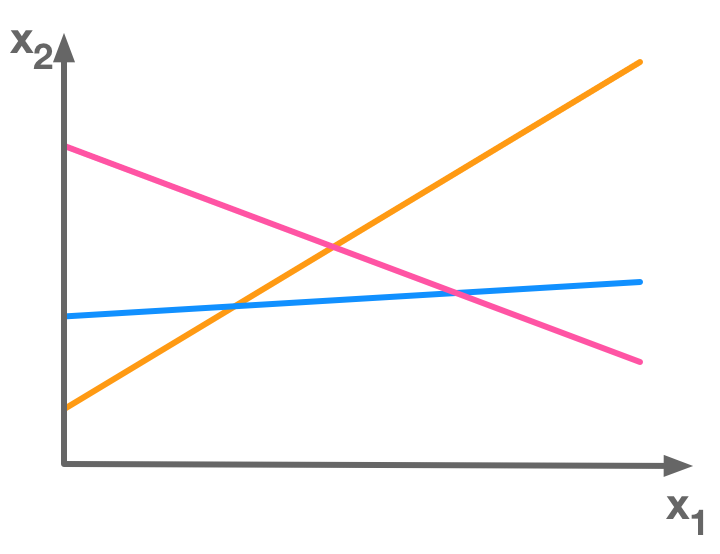

### Use pseudoinverse to find the approximate solution of the following system of linear equations:
#### -2x1 - x2 = -2 , 4x1 - x2 = -8 , -x1 - x2 =-2

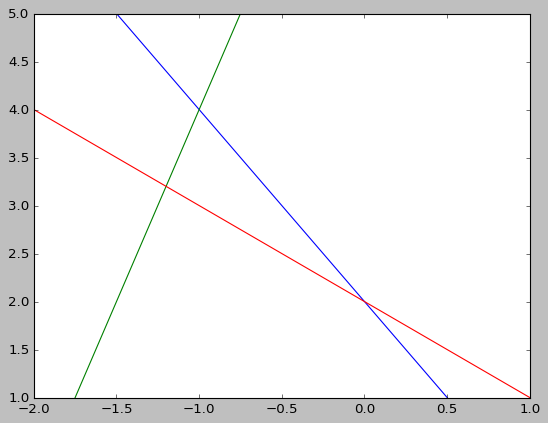

In [64]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [65]:
A=np.array([[-2,-1],[4,-1],[-1,-1]])
b=np.array([[-2],[-8],[-2]])


In [66]:
A_P=pesudo_inverse(A)
A_P

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [67]:
res=A_P @ b
res

array([[-1.06451613],
       [ 3.64516129]])

In [68]:
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

In [69]:

res

array([[-1.06451613],
       [ 3.64516129]])

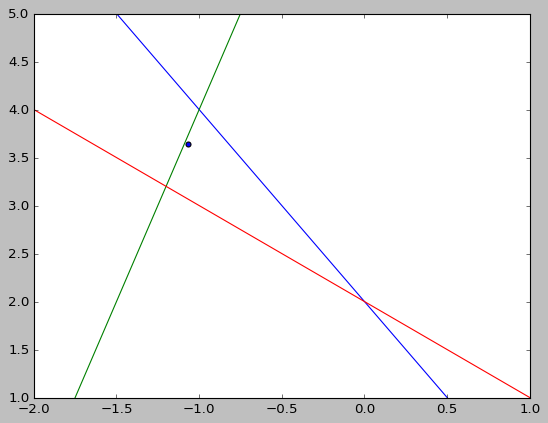

In [70]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()

## Bisection Method
- Implement the <b>bisection method</b> as a function and solve the following equations:
    - 𝒇(𝒙)=𝒙^𝟑−𝒙−𝟐,          𝒙∈[𝟏,𝟐]
    - 𝒇(𝒙)=𝒙^2−𝟐,          𝒙∈[0,𝟐]
- Draw both functions and check out the roots.
- Try your function in another intervals and check out the results.

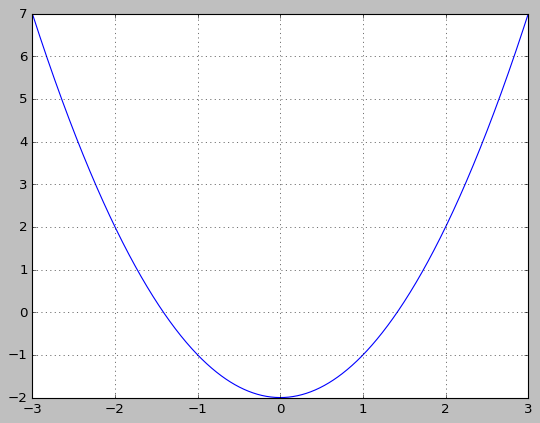

In [71]:
x=np.linspace(-3,3,1000)
y=x**2-2 
plt.plot(x,y)
plt.grid()

In [72]:
def bi_section(a,b,f,iterations):
        a_list=[]
        b_list=[]
        error_list=[]
        a_list.append(a)
        b_list.append(b)
        e=abs(b-a)
        error_list.append(e)
        for i in range(iterations):
            m=(a_list[i]+b_list[i])/2
            y=f(m)
            if y<0:
                a=m
                b=b
                a_list.append(a)
                b_list.append(b)
            else:
                b=m
                a=a
                a_list.append(a)
                b_list.append(b)

            e=abs(b_list[i]-a_list[i])
            if abs(e)<0.001 and abs(f(a_list[i])-0)<0.0001 and abs(f(b_list[i])-0)<0.0001:
                print("break at {}".format(i))
                break 
        print("r0 is {}".format(a_list[-1]))  
        print("r1 is {}".format(b_list[-1])) 
        print("f(r0) is {}".format(f(a_list[-1])))
        print("f(r1) is {}".format(f(b_list[-1])))


In [73]:
f=lambda x:x**2-2
bi_section(0,2,f,1000)

break at 15
r0 is 1.4141845703125
r1 is 1.414215087890625
f(r0) is -8.200109004974365e-05
f(r1) is 4.314817488193512e-06


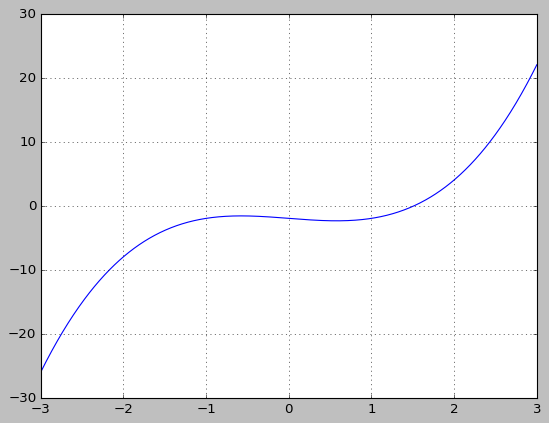

In [74]:
x=np.linspace(-3,3,1000)
y=x**3-x-2
plt.plot(x,y)
plt.grid()

In [75]:
f=lambda x:x**3-x-2
bi_section(1,2,f,1000)

break at 16
r0 is 1.5213775634765625
r1 is 1.5213851928710938
f(r0) is -1.2739467674549587e-05
f(r1) is 3.260815724592803e-05


## Fixed Point Iteration Method
- Implement the <b>Newton's method</b> as a function and solve the following equations:
    - $f(x) = x^2 - x - 1 = 0$
    - $𝒇(𝒙)=𝒙−𝒔𝒊𝒏(𝒙)−𝟎.𝟓$
- Draw the functions and check out the roots.
- Draw g(x).
- Try your function with different initialization and check out the results..

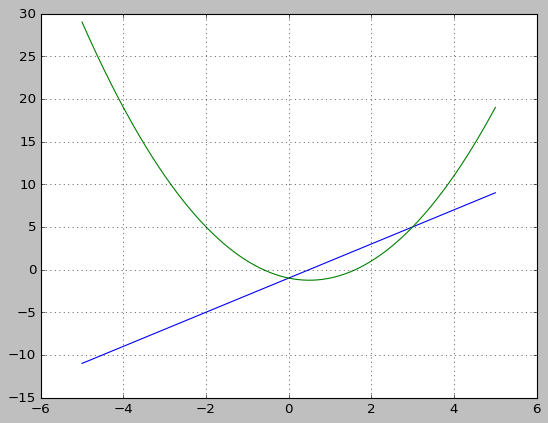

In [100]:
x=np.linspace(-5,5,1000)
f_x=lambda x:x**2-x-1
f_dash_x=lambda x:2*x-1
plt.plot(x,f_dash_x(x))
plt.plot(x,f_x(x))
plt.grid()

In [35]:
from prettytable import PrettyTable as Table
f_x=lambda x:x**2-x-1
f_dash_x=lambda x:2*x-1
def Newton_raphson(x,f_x,f_dash_x,iterations,tolerance):
        table = Table(["Iter", "Pn", "Pn+1", "|Pn+1 - Pn|"])
        x_list=[]
        x_list.append(x)
        for i in range(iterations):
            x=x-f_x(x)/f_dash_x(x)
            x_list.append(x)
            e=x_list[i]-x_list[i-1]
            table.add_row([i+1, x_list[i-1], x_list[i], abs(e)])
            if abs(e)<tolerance and i>0:#and abs(f(x_list[i])-0.0)<0.001:
                print("break at {} iter".format(i))
                break
        print(x_list[-1])
        print(f_x(x_list[-1])) 
        return table

In [36]:
Newton_raphson(1,f_x,f_dash_x,1000,0.0001)

break at 5 iter
1.618033988749895
0.0


+------+--------------------+--------------------+-----------------------+
| Iter |         Pn         |        Pn+1        |      |Pn+1 - Pn|      |
+------+--------------------+--------------------+-----------------------+
|  1   |        2.0         |         1          |          1.0          |
|  2   |         1          |        2.0         |          1.0          |
|  3   |        2.0         | 1.6666666666666667 |  0.33333333333333326  |
|  4   | 1.6666666666666667 | 1.619047619047619  |  0.04761904761904767  |
|  5   | 1.619047619047619  | 1.618034447821682  | 0.0010131712259371373 |
|  6   | 1.618034447821682  | 1.618033988749989  | 4.590716928820626e-07 |
+------+--------------------+--------------------+-----------------------+

In [99]:
from scipy.optimize import fsolve
fsolve(f_x,1)

array([1.61803399])

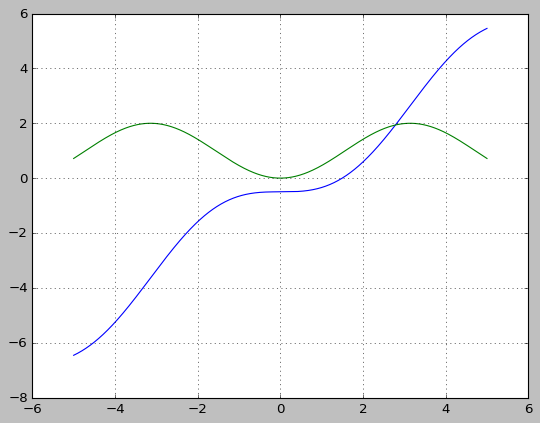

In [101]:
x=np.linspace(-5,5,1000)
f_x=lambda x:x-np.sin(x)-0.5
f_dash_x=lambda x:1-np.cos(x)
plt.plot(x,f_x(x))
plt.plot(x,f_dash_x(x))
plt.grid()

In [37]:
f_x=lambda x:x-np.sin(x)-0.5
f_dash_x=lambda x:1-np.cos(x)
Newton_raphson(1,f_x,f_dash_x,1000,0.000001)

break at 5 iter
1.4973003890958922
-1.1102230246251565e-16


+------+--------------------+--------------------+-----------------------+
| Iter |         Pn         |        Pn+1        |      |Pn+1 - Pn|      |
+------+--------------------+--------------------+-----------------------+
|  1   | 1.7428163968774413 |         1          |   0.7428163968774413  |
|  2   |         1          | 1.7428163968774413 |   0.7428163968774413  |
|  3   | 1.7428163968774413 | 1.522886966091886  |  0.21992943078555527  |
|  4   | 1.522886966091886  | 1.4976436369181578 |  0.02524332917372818  |
|  5   | 1.4976436369181578 | 1.4973004524799622 | 0.0003431844381955873 |
|  6   | 1.4973004524799622 | 1.4973003890958945 | 6.338406777217642e-08 |
+------+--------------------+--------------------+-----------------------+

In [105]:
fsolve(f_x,0.5)

array([1.49730039])

## Newton-Raphson Method
- Implement the <b>Newton's method</b> as a function and solve the following equations:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
    - $𝒄𝒐𝒔(𝒙)=𝒙$,                      [0,2]
    - $𝒇(𝒙)=𝒙^𝟑−𝟐𝒙+𝟐$,               𝒙_𝟎=-2
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.

In [38]:
f1_x=lambda x:x**3-x**2-15*x+1
f1_dash_x=lambda x:3*x**2-2*x-15
Newton_raphson(4.5,f1_x,f1_dash_x,1000,0.000001)

break at 4 iter
4.375753855671946
1.4210854715202004e-14


+------+-------------------+-------------------+------------------------+
| Iter |         Pn        |        Pn+1       |      |Pn+1 - Pn|       |
+------+-------------------+-------------------+------------------------+
|  1   | 4.380952380952381 |        4.5        |  0.11904761904761862   |
|  2   |        4.5        | 4.380952380952381 |  0.11904761904761862   |
|  3   | 4.380952380952381 | 4.375763555606645 |  0.00518882534573617   |
|  4   | 4.375763555606645 | 4.375753855705814 | 9.699900830995034e-06  |
|  5   | 4.375753855705814 | 4.375753855671946 | 3.3868019500005175e-11 |
+------+-------------------+-------------------+------------------------+

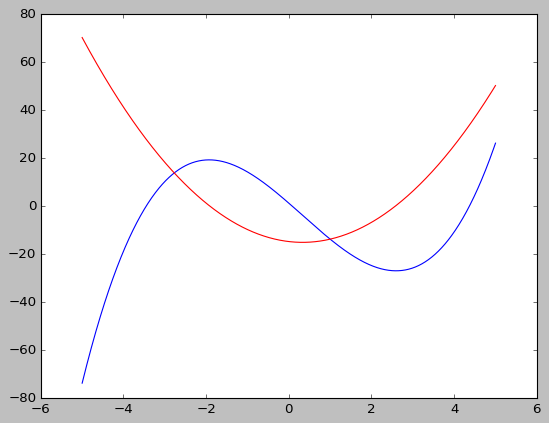

In [117]:
plt.plot(x,f1_x(x))
plt.plot(x,f1_dash_x(x),'r-')

In [118]:
f2_x=lambda x:np.cos(x)-x
f2_dash_x=lambda x:-1*np.sin(x)-1
Newton_raphson(1,f2_x,f2_dash_x,1000,0.000001)

break at 4 iter
0.7390851332151607
0.0


+------+--------------------+--------------------+------------------------+
| Iter |         Pn         |        Pn+1        |      |Pn+1 - Pn|       |
+------+--------------------+--------------------+------------------------+
|  0   | 0.7503638678402439 |         1          |   0.2496361321597561   |
|  1   |         1          | 0.7503638678402439 |   0.2496361321597561   |
|  2   | 0.7503638678402439 | 0.7391128909113617 |  0.011250976928882217  |
|  3   | 0.7391128909113617 | 0.739085133385284  | 2.7757526077643035e-05 |
|  4   | 0.739085133385284  | 0.7390851332151607 | 1.7012335984389892e-10 |
+------+--------------------+--------------------+------------------------+

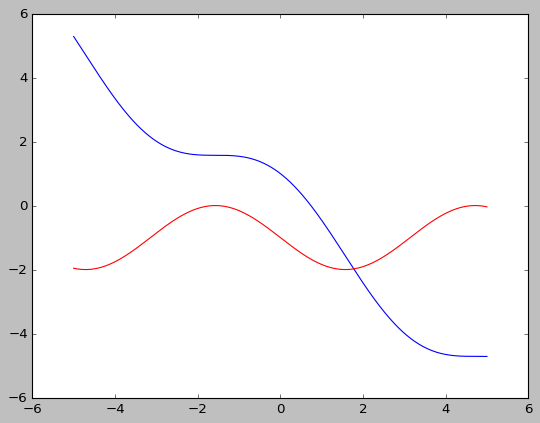

In [119]:
plt.plot(x,f2_x(x))
plt.plot(x,f2_dash_x(x),'r-')

In [39]:
f3_x=lambda x:x**3-2*x+2
f3_dash_x=lambda x:3*x**2-2
Newton_raphson(-2,f3_x,f3_dash_x,1000,0.000001)

break at 4 iter
-1.7692923542386314
0.0


+------+---------------------+---------------------+------------------------+
| Iter |          Pn         |         Pn+1        |      |Pn+1 - Pn|       |
+------+---------------------+---------------------+------------------------+
|  1   |         -1.8        |          -2         |  0.19999999999999996   |
|  2   |          -2         |         -1.8        |  0.19999999999999996   |
|  3   |         -1.8        | -1.7699481865284974 |  0.030051813471502653  |
|  4   | -1.7699481865284974 |  -1.769292662905941 | 0.0006555236225564975  |
|  5   |  -1.769292662905941 | -1.7692923542386998 | 3.0866724110012456e-07 |
+------+---------------------+---------------------+------------------------+

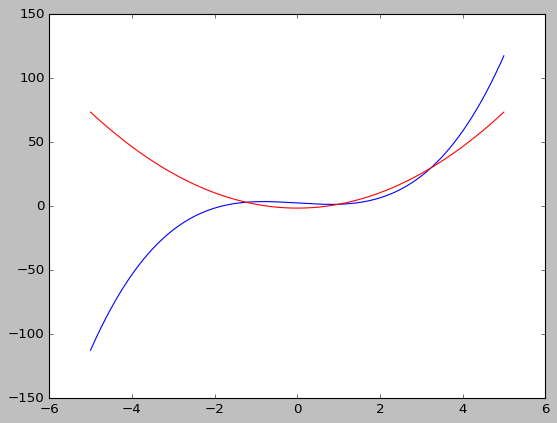

In [121]:
plt.plot(x,f3_x(x))
plt.plot(x,f3_dash_x(x),'r-')

### Use scipy.optimize.fsolve() to solve the above equations and compare your results.

In [122]:
from scipy.optimize import fsolve

In [123]:
fsolve(f1_x,4.5)

array([4.37575386])

In [124]:
fsolve(f2_x,1)

array([0.73908513])

In [126]:
fsolve(f3_x,-2)

array([-1.76929235])